Import and preprocess data

In [5]:
import zipfile

zip_ref= zipfile.ZipFile("archive.zip", "r")
zip_ref.extractall(path="./data")
zip_ref.close()

In [8]:
import os 

for dirpath, dirnames, filenames in os.walk("data/data"):
    print(f'there are {len(dirnames)} directory and {len(filenames)} images in {dirpath}')

there are 2 directory and 0 images in data/data
there are 4 directory and 0 images in data/data/train
there are 0 directory and 1722 images in data/data/train/Leaf Blight
there are 0 directory and 1888 images in data/data/train/Black Rot
there are 0 directory and 1920 images in data/data/train/ESCA
there are 0 directory and 1692 images in data/data/train/Healthy
there are 4 directory and 0 images in data/data/test
there are 0 directory and 430 images in data/data/test/Leaf Blight
there are 0 directory and 472 images in data/data/test/Black Rot
there are 0 directory and 480 images in data/data/test/ESCA
there are 0 directory and 423 images in data/data/test/Healthy


Plot a sample

In [26]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random 

def display_image(dir, clas):
    folder= dir+clas
    random_img= random.sample(os.listdir(folder), 1)
    img= mpimg.imread(folder+"/"+random_img[0])
    plt.imshow(img)
    plt.title(clas)
    plt.axis("off")
    print(f"image shape {img.shape}")
    return img

image shape (256, 256, 3)


array([[[170, 158, 158],
        [178, 166, 166],
        [163, 151, 151],
        ...,
        [195, 185, 184],
        [197, 187, 186],
        [198, 188, 187]],

       [[170, 158, 158],
        [180, 168, 168],
        [171, 159, 159],
        ...,
        [195, 185, 184],
        [197, 187, 186],
        [198, 188, 187]],

       [[165, 153, 153],
        [177, 165, 165],
        [172, 160, 160],
        ...,
        [195, 185, 184],
        [197, 187, 186],
        [198, 188, 187]],

       ...,

       [[175, 164, 168],
        [182, 171, 175],
        [186, 175, 179],
        ...,
        [194, 188, 190],
        [193, 187, 189],
        [193, 187, 189]],

       [[192, 181, 185],
        [180, 169, 173],
        [169, 158, 162],
        ...,
        [195, 189, 191],
        [194, 188, 190],
        [194, 188, 190]],

       [[194, 183, 187],
        [190, 179, 183],
        [186, 175, 179],
        ...,
        [195, 189, 191],
        [195, 189, 191],
        [195, 189, 191]]

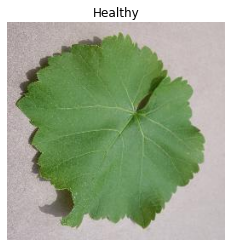

In [28]:
display_image(dir="data/data/test/", clas="Healthy")

Load test images and train images

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE= (224, 224)
BATCH_SIZE=32

train_dir="data/data/train"
test_dir="data/data/test"

train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

print("train images")
train_data=train_datagen.flow_from_directory(train_dir, target_size= IMAGE_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")

print("test images")
test_data=test_datagen.flow_from_directory(test_dir, target_size= IMAGE_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")

train images
Found 7222 images belonging to 4 classes.
test images
Found 1805 images belonging to 4 classes.


create efficient net model for feature extraction

In [10]:
import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow.keras import layers

url ="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

def create_model( url, n_classes):
    feature_extractor_layer= hub.KerasLayer(url, trainable=False, input_shape= IMAGE_SHAPE+(3,))
    model= tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(n_classes, activation="softmax", name='output_layer')
    ])
    return model

compile and fit the model to the training dataset

In [11]:
efficient_net= create_model(url=url, n_classes=4)

efficient_net.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history= efficient_net.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

2023-03-12 17:34:37.772242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 17:34:37.772527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 17:34:37.772571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-12 17:34:37.772606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-12 17:34:37.772640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/5


2023-03-12 17:34:49.361676: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2023-03-12 17:34:49.400920: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2023-03-12 17:34:49.417554: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2023-03-12 17:34:49.429122: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.
2023-03-12 17:34:49.439412: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 51380224 exceeds 10% of free system memory.


226/226 [==============================] - 141s 599ms/step - loss: 0.2781 - accuracy: 0.9259 - val_loss: 0.1098 - val_accuracy: 0.9712
Epoch 2/5
226/226 [==============================] - 132s 586ms/step - loss: 0.0801 - accuracy: 0.9813 - val_loss: 0.0686 - val_accuracy: 0.9778
Epoch 3/5
226/226 [==============================] - 134s 595ms/step - loss: 0.0536 - accuracy: 0.9878 - val_loss: 0.0521 - val_accuracy: 0.9817
Epoch 4/5
226/226 [==============================] - 135s 598ms/step - loss: 0.0409 - accuracy: 0.9904 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 5/5
226/226 [==============================] - 137s 605ms/step - loss: 0.0333 - accuracy: 0.9922 - val_loss: 0.0355 - val_accuracy: 0.9911


In [12]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    loss= history.history['loss']
    val_loss= history.history['val_loss']

    accuracy= history.history['accuracy']
    val_accuracy= history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label= 'training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.legend()

evaluate and plot the loss/accuracy curves 

In [25]:
efficient_net.evaluate(test_data)

57/57 [==============================] - 27s 467ms/step - loss: 0.0355 - accuracy: 0.9911


[0.03548550233244896, 0.9911357164382935]

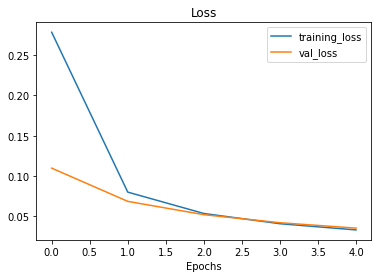

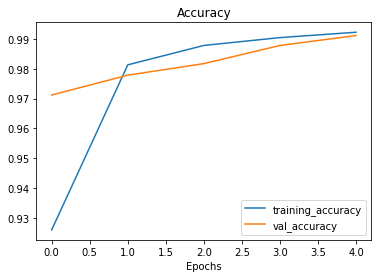

In [13]:
plot_loss_curves(history=history)

In [37]:
import pathlib 
import numpy as np

class_name= np.array([sorted(item.name for item in pathlib.Path("data/data/train/").glob('*'))]) [0]
class_name

array(['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight'], dtype='<U11')

Predict unseen data

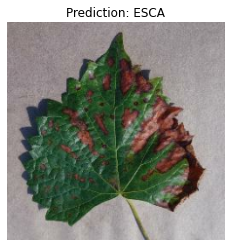

In [64]:
def predict_and_plot(model, filename, class_name):
    img= tf.image.resize(tf.image.decode_image(tf.io.read_file(filename), channels=3), size=[224, 224])
    img= img/255. 
    pred= model.predict(tf.expand_dims(img, axis=0))
    i=0
    for j in tf.round(pred[0]):
        if j==1:
            break
        i=i+1
    pred_class= class_name[int(tf.round(i))]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

predict_and_plot(efficient_net, filename="data/data/test/ESCA/01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153_flipLR.JPG", class_name= class_name)